In [1]:
# Script Name: EDA Analysis on the Datasets
# Author: Rahul Kumar
# Date: 11/3/22
# Description: Gain some insights on the dataset

import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

# This actually sets the pandas display to show all rows and columns 
# when you are showing a dataframe, without skipping the center
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Strings for using in writing of files

filepath = '../../UNSW-PROJECT-DATA/' # If you want to run the code, change the file path to where you store the files. This reference
                                # is to where I store the files outside the github clone
    
images = 'images/' #My folder specific image folder

csv = '.csv'
xlsx = '.xlsx'

In [3]:
# c_file = 'combined'
# c_file = 'combined_fd_Avg'
c_file = 'demand_pv_temp_forecast_timefeatures_hols'

data = pd.read_csv(filepath+c_file+csv)
# data = data.drop(data.columns[0], axis=1)

def day_type_cat(day_type):
    if day_type =='Day':
        return 0
    else:
        return 1


In [4]:
data.head()

,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,TEMPERATURE,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY
0,NSW,2010-01-01 00:00:00,8038.00,NaN,Bankstown,23.1,7824.411831,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
1,NSW,2010-01-01 00:30:00,7809.31,NaN,Bankstown,22.9,7680.510417,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
2,NSW,2010-01-01 01:00:00,7483.69,NaN,Bankstown,22.6,7428.971370,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
3,NSW,2010-01-01 01:30:00,7117.23,NaN,Bankstown,22.5,7084.802162,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
4,NSW,2010-01-01 02:00:00,6812.03,NaN,Bankstown,22.5,6751.369600,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True


In [5]:
data.shape

(726195, 17)

In [6]:
data.info() # Date time objects arent date time objects

data['DATETIME'] = pd.to_datetime(data['DATETIME'])
data['WeekDayNo'] = data['DATETIME'].dt.dayofweek
data['SUNRISE'] = pd.to_datetime(data['SUNRISE'])
data['SUNSET'] = pd.to_datetime(data['SUNSET'])
data['DAYTYPE_no'] = data['DAYTYPE'].apply(day_type_cat)

#adding month name
data['Month Name'] = data['DATETIME'].dt.month_name()

print('\n===================================================================================================\n')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726195 entries, 0 to 726194
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   STATE           726195 non-null  object 
 1   DATETIME        726195 non-null  object 
 2   TOTALDEMAND     726195 non-null  float64
 3   POWER           212514 non-null  float64
 4   LOCATION        726195 non-null  object 
 5   TEMPERATURE     726183 non-null  float64
 6   FORECASTDEMAND  417844 non-null  float64
 7   Weekday         726195 non-null  object 
 8   Quarter         726195 non-null  int64  
 9   Month           726195 non-null  int64  
 10  Season          726195 non-null  object 
 11  Day             726195 non-null  int64  
 12  Year            726195 non-null  int64  
 13  SUNRISE         726195 non-null  object 
 14  SUNSET          726195 non-null  object 
 15  DAYTYPE         726195 non-null  object 
 16  HOLIDAY         726195 non-null  bool   
dtypes: bool(1)

In [7]:
data.head()

,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,TEMPERATURE,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY,WeekDayNo,DAYTYPE_no,Month Name
0,NSW,2010-01-01 00:00:00,8038.00,NaN,Bankstown,23.1,7824.411831,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
1,NSW,2010-01-01 00:30:00,7809.31,NaN,Bankstown,22.9,7680.510417,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
2,NSW,2010-01-01 01:00:00,7483.69,NaN,Bankstown,22.6,7428.971370,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
3,NSW,2010-01-01 01:30:00,7117.23,NaN,Bankstown,22.5,7084.802162,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
4,NSW,2010-01-01 02:00:00,6812.03,NaN,Bankstown,22.5,6751.369600,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January


In [8]:
data.describe()

,TOTALDEMAND,POWER,TEMPERATURE,FORECASTDEMAND,Quarter,Month,Day,Year,WeekDayNo,DAYTYPE_no
count,726195.000000,212514.000000,726183.000000,417844.000000,726195.000000,726195.000000,726195.000000,726195.000000,726195.000000,726195.000000
mean,5150.459706,314.059966,18.750729,5996.960031,2.489187,6.463139,15.694263,2015.431065,2.999933,0.493213
std,2695.260017,478.144853,6.010580,2708.381711,1.125204,3.476231,8.795404,3.148891,2.000311,0.499954
min,21.890000,0.000000,-1.300000,191.467609,1.000000,1.000000,1.000000,2010.000000,0.000000,0.000000
25%,1861.545000,0.000000,14.400000,4568.020691,1.000000,3.000000,8.000000,2013.000000,1.000000,0.000000
50%,5591.150000,3.852000,19.000000,6411.130926,2.000000,6.000000,16.000000,2016.000000,3.000000,0.000000
75%,7017.870000,525.308250,23.000000,8006.319180,3.000000,9.000000,23.000000,2018.000000,5.000000,1.000000
max,14579.860000,2565.377000,44.700000,14601.171964,4.000000,12.000000,31.000000,2021.000000,6.000000,1.000000


In [9]:
data.isnull().sum()

STATE                  0
DATETIME               0
TOTALDEMAND            0
POWER             513681
LOCATION               0
TEMPERATURE           12
FORECASTDEMAND    308351
Weekday                0
Quarter                0
Month                  0
Season                 0
Day                    0
Year                   0
SUNRISE                0
SUNSET                 0
DAYTYPE                0
HOLIDAY                0
WeekDayNo              0
DAYTYPE_no             0
Month Name             0
dtype: int64

In [10]:
data.shape

(726195, 20)

In [11]:
data.nunique()

STATE                  4
DATETIME          196513
TOTALDEMAND       445470
POWER             104430
LOCATION               4
TEMPERATURE          448
FORECASTDEMAND    417724
Weekday                7
Quarter                4
Month                 12
Season                 4
Day                   31
Year                  12
SUNRISE            15028
SUNSET             15031
DAYTYPE                2
HOLIDAY                2
WeekDayNo              7
DAYTYPE_no             2
Month Name            12
dtype: int64

In [12]:
data.columns

Index(['STATE', 'DATETIME', 'TOTALDEMAND', 'POWER', 'LOCATION', 'TEMPERATURE',
       'FORECASTDEMAND', 'Weekday', 'Quarter', 'Month', 'Season', 'Day',
       'Year', 'SUNRISE', 'SUNSET', 'DAYTYPE', 'HOLIDAY', 'WeekDayNo',
       'DAYTYPE_no', 'Month Name'],
      dtype='object')

In [13]:
data.corr()

,TOTALDEMAND,POWER,TEMPERATURE,FORECASTDEMAND,Quarter,Month,Day,Year,HOLIDAY,WeekDayNo,DAYTYPE_no
TOTALDEMAND,1.000000,0.123720,-0.078421,0.997951,-0.040550,-0.039208,0.001219,-0.035795,-0.032148,-0.062622,-0.068285
POWER,0.123720,1.000000,0.460601,0.121880,0.033472,0.033594,0.000960,0.150739,0.010130,-0.005365,-0.648997
TEMPERATURE,-0.078421,0.460601,1.000000,-0.089073,-0.133926,-0.130122,-0.015606,0.016022,0.053460,0.002037,-0.423516
FORECASTDEMAND,0.997951,0.121880,-0.089073,1.000000,-0.034265,-0.032331,0.004548,-0.493921,-0.042293,-0.072920,-0.066053
Quarter,-0.040550,0.033472,-0.133926,-0.034265,1.000000,0.971859,0.017353,-0.055553,-0.035646,-0.001101,-0.015440
Month,-0.039208,0.033594,-0.130122,-0.032331,0.971859,1.000000,0.014416,-0.056232,-0.045374,-0.000860,-0.015044
Day,0.001219,0.000960,-0.015606,0.004548,0.017353,0.014416,1.000000,-0.007192,0.014317,0.002299,0.000275
Year,-0.035795,0.150739,0.016022,-0.493921,-0.055553,-0.056232,-0.007192,1.000000,0.000348,-0.000781,-0.004112
HOLIDAY,-0.032148,0.010130,0.053460,-0.042293,-0.035646,-0.045374,0.014317,0.000348,1.000000,-0.067924,-0.006674
WeekDayNo,-0.062622,-0.005365,0.002037,-0.072920,-0.001101,-0.000860,0.002299,-0.000781,-0.067924,1.000000,-0.000001


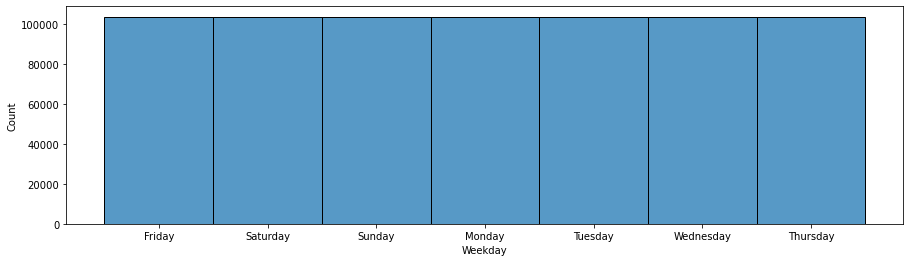

In [14]:
plt.figure(figsize=(15,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="Weekday")
plt.show()

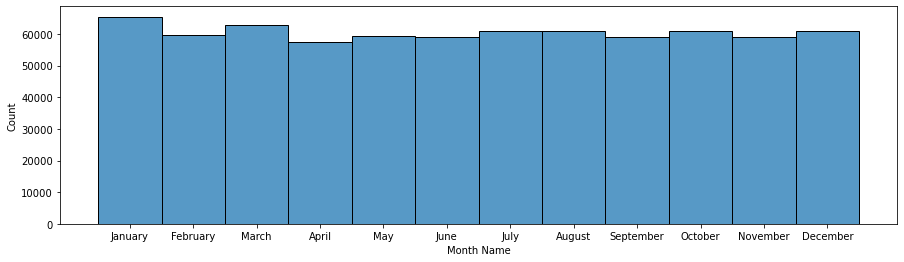

In [15]:
plt.figure(figsize=(15,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="Month Name")
plt.show()

In [16]:
# plt.figure(figsize=(10,4)) # this creates a figure 8 inch wide, 4 inch high
# sns.histplot(data, x="STATE")
# plt.show()

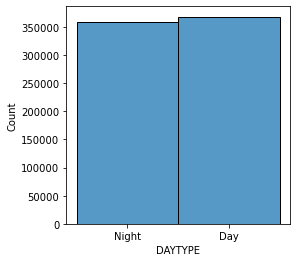

In [17]:
plt.figure(figsize=(4,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="DAYTYPE")
plt.show()

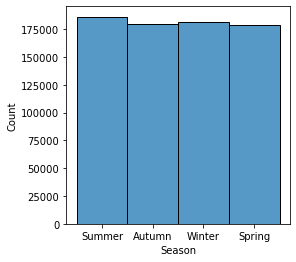

In [18]:
plt.figure(figsize=(4,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="Season")
plt.show()

In [19]:
percent_missing = round(data.isnull().sum() * 100 / len(data),2)
missing_value_df = pd.DataFrame({'% Missing': percent_missing})
missing_value_df

,% Missing
STATE,0.00
DATETIME,0.00
TOTALDEMAND,0.00
POWER,70.74
LOCATION,0.00
TEMPERATURE,0.00
FORECASTDEMAND,42.46
Weekday,0.00
Quarter,0.00
Month,0.00


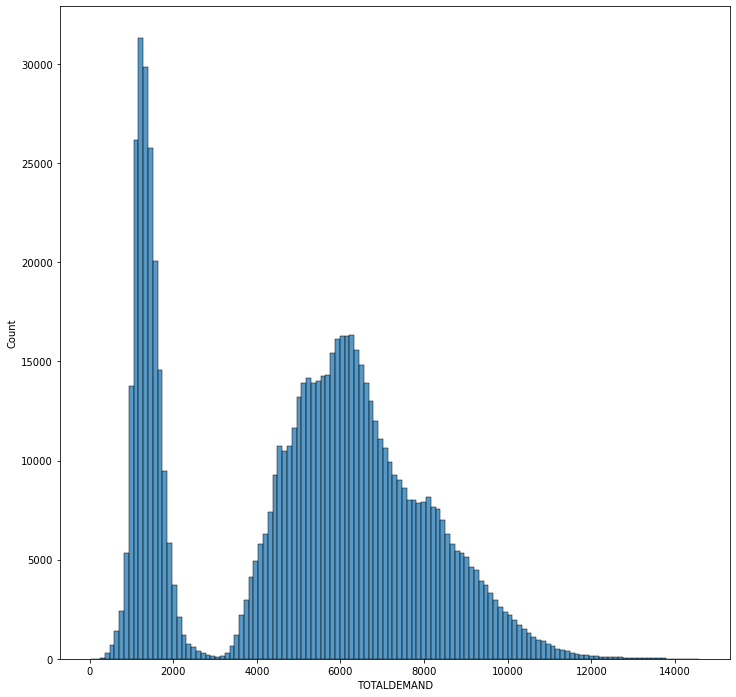

In [20]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="TOTALDEMAND")
plt.show()

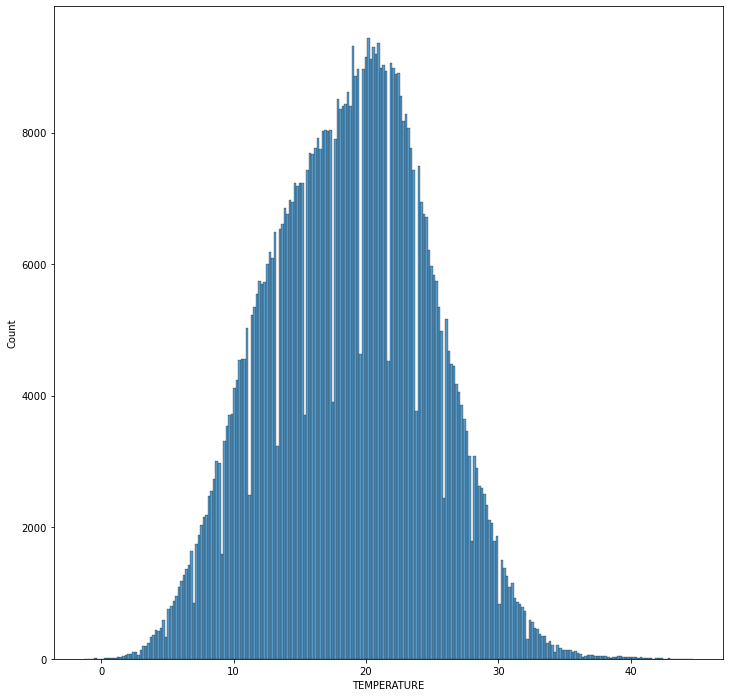

In [21]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="TEMPERATURE")
plt.show()

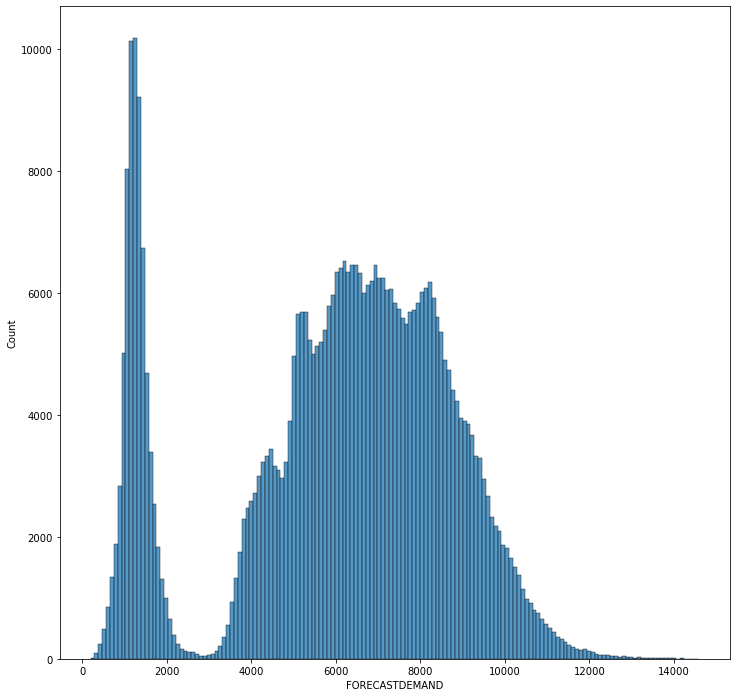

In [22]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="FORECASTDEMAND")
plt.show()

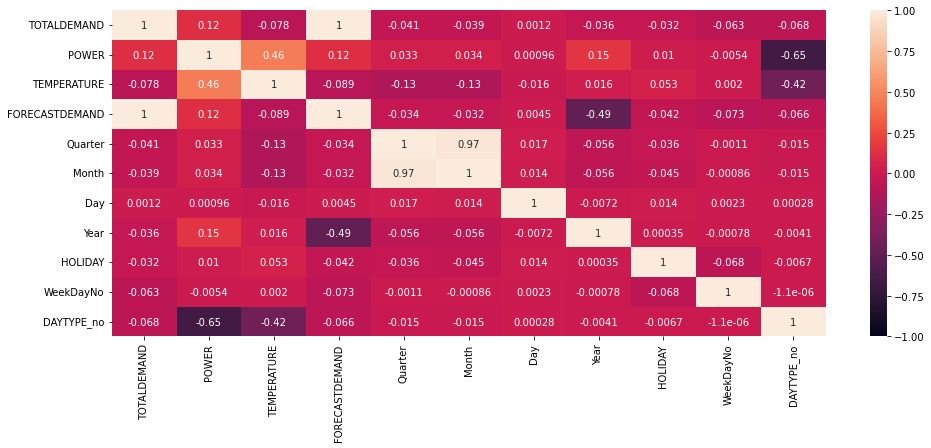

In [23]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

In [24]:
data.corr()[['TOTALDEMAND']].sort_values(by='TOTALDEMAND', ascending=False)

,TOTALDEMAND
TOTALDEMAND,1.000000
FORECASTDEMAND,0.997951
POWER,0.123720
Day,0.001219
HOLIDAY,-0.032148
Year,-0.035795
Month,-0.039208
Quarter,-0.040550
WeekDayNo,-0.062622
DAYTYPE_no,-0.068285


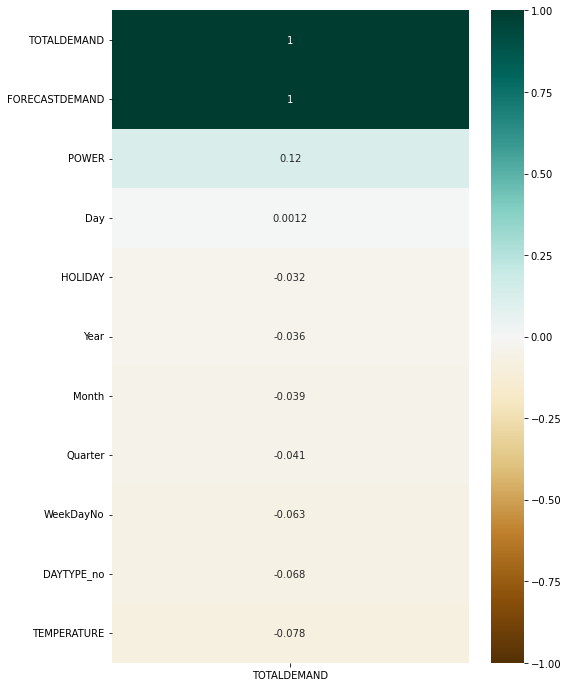

In [25]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['TOTALDEMAND']].sort_values(by='TOTALDEMAND', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

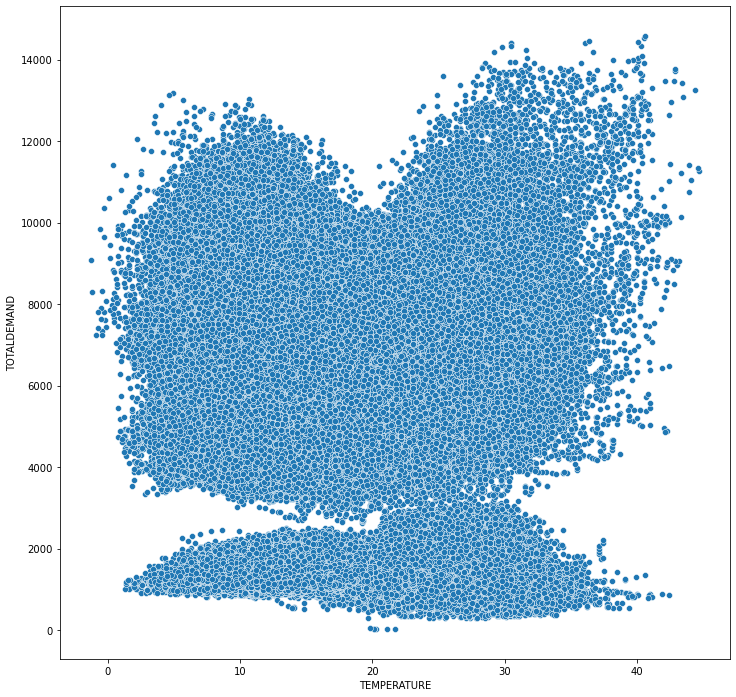

In [26]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.scatterplot(data=data, x="TEMPERATURE", y="TOTALDEMAND")
plt.show()

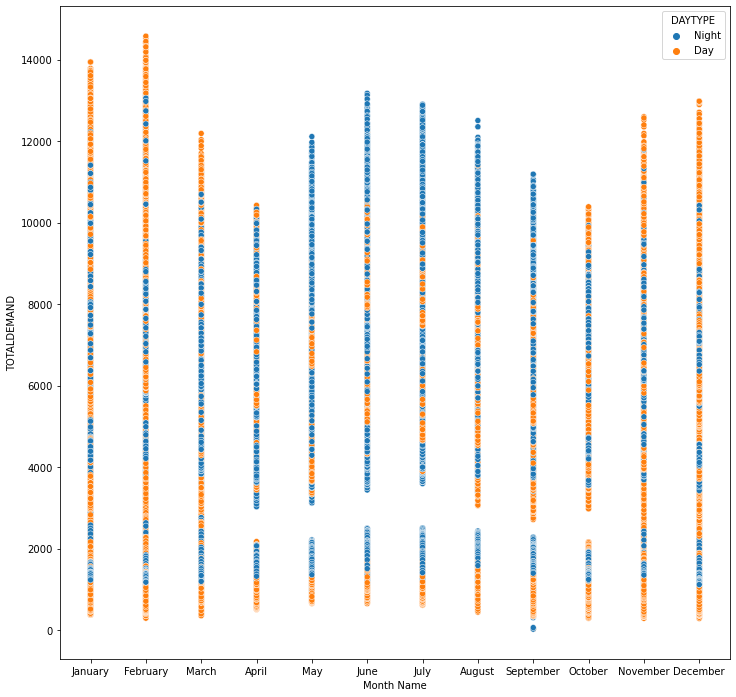

In [27]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.scatterplot(data=data, x="Month Name", y="TOTALDEMAND", hue='DAYTYPE')
plt.show()

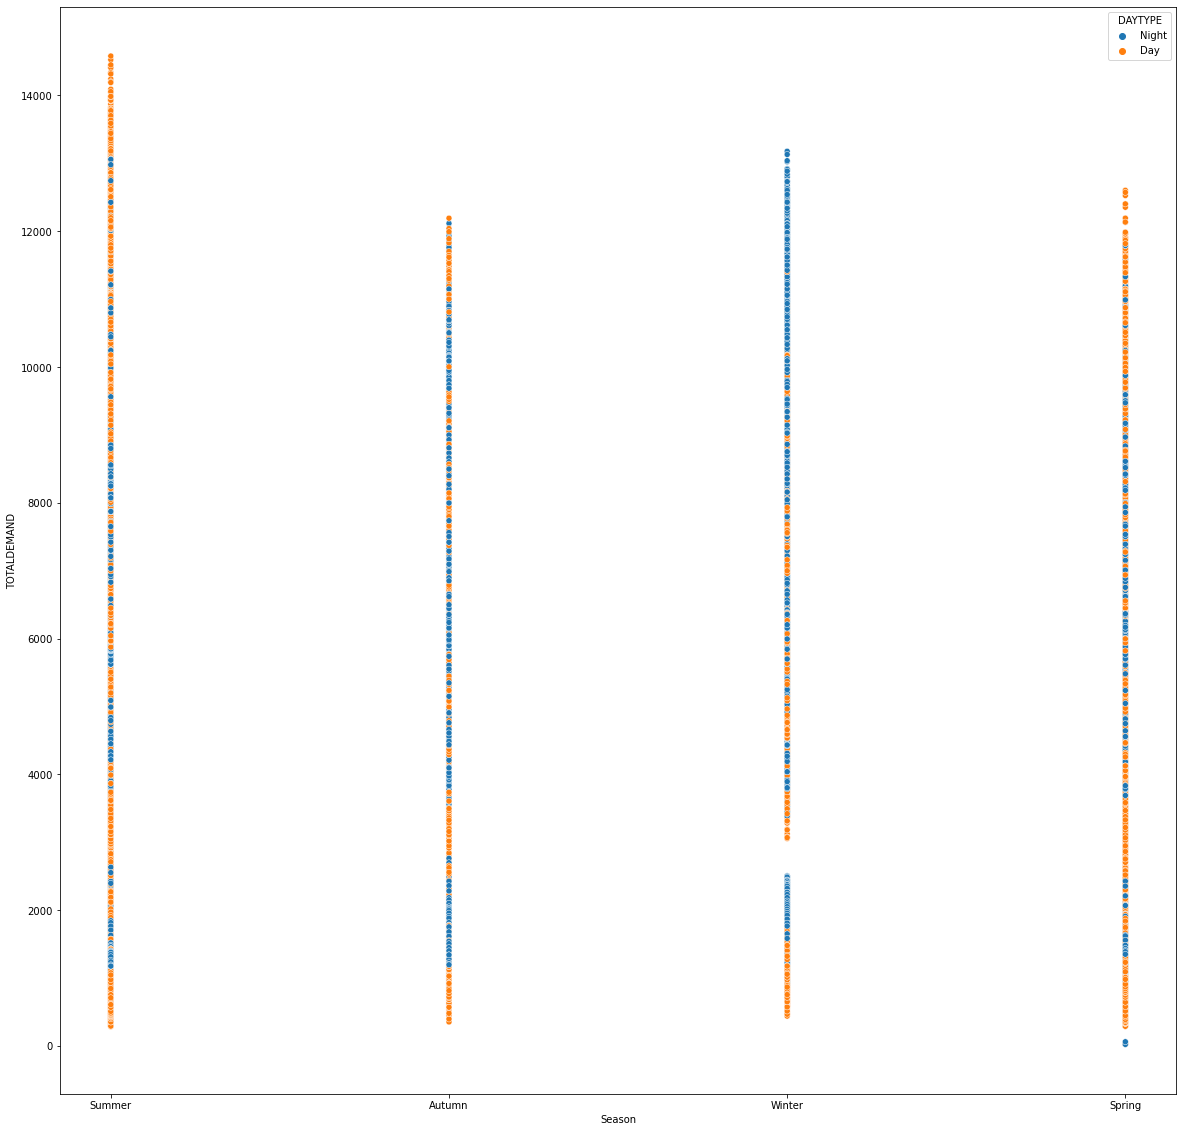

In [28]:
plt.figure(figsize=(20,20)) # this creates a figure 8 inch wide, 4 inch high
sns.scatterplot(data=data, x="Season", y="TOTALDEMAND", hue='DAYTYPE')
plt.show()

In [29]:
df = data.dropna()
df.head(150)

,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,TEMPERATURE,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY,WeekDayNo,DAYTYPE_no,Month Name
513474,NSW,2018-03-06 09:30:00,8325.67,427.281,Bankstown,21.8,8432.046190,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March
513475,NSW,2018-03-06 10:00:00,8338.62,495.195,Bankstown,21.5,8413.074419,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March
513476,NSW,2018-03-06 10:30:00,8323.66,516.137,Bankstown,22.7,8367.147273,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March
513477,NSW,2018-03-06 11:00:00,8264.99,549.542,Bankstown,22.1,8334.082667,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March
513478,NSW,2018-03-06 11:30:00,8247.11,556.764,Bankstown,22.5,8289.618478,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March
513479,NSW,2018-03-06 12:00:00,8249.70,605.312,Bankstown,23.0,8272.324894,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March
513480,NSW,2018-03-06 12:30:00,8201.18,622.850,Bankstown,23.2,8276.585208,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March
513481,NSW,2018-03-06 13:00:00,8184.98,623.553,Bankstown,23.6,8290.181837,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March
513482,NSW,2018-03-06 13:30:00,8175.64,620.090,Bankstown,23.9,8304.281800,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March
513483,NSW,2018-03-06 14:00:00,8194.56,571.619,Bankstown,23.0,8323.282941,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March


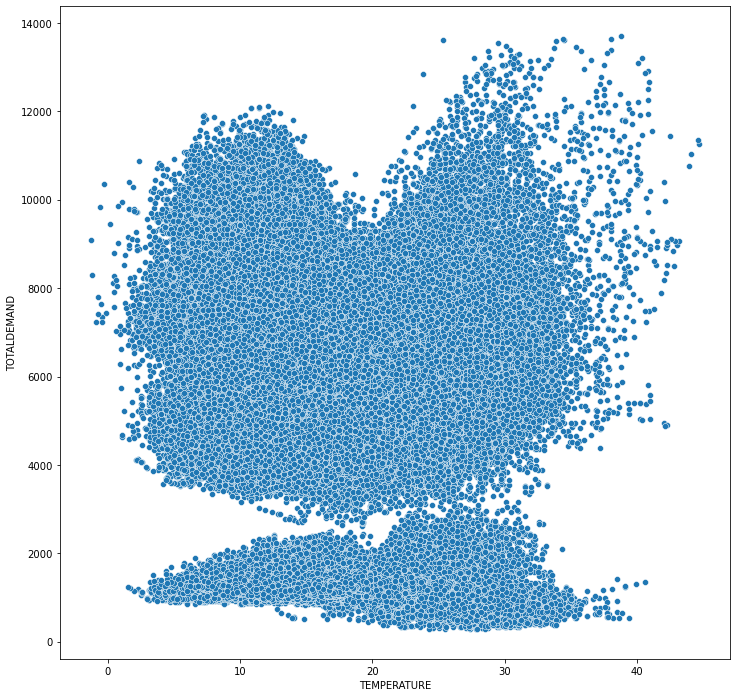

In [30]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.scatterplot(data=df, x="TEMPERATURE", y="TOTALDEMAND")
plt.show()

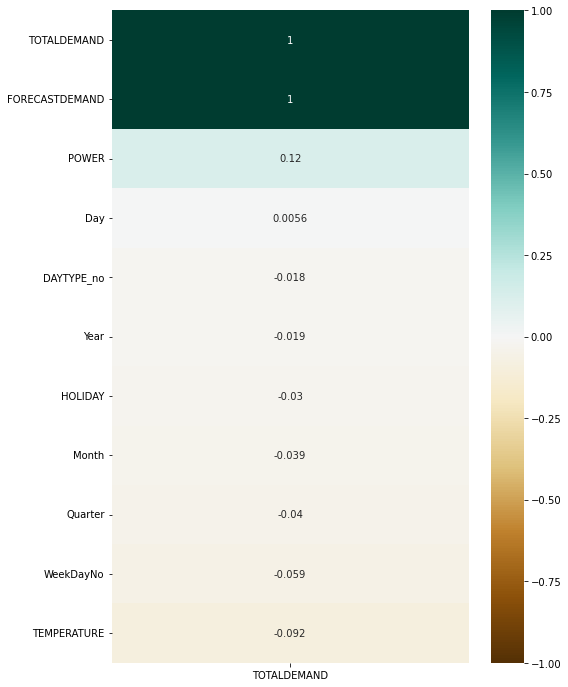

In [31]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['TOTALDEMAND']].sort_values(by='TOTALDEMAND', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [41]:
state = df.loc[df['STATE'] == 'NSW']

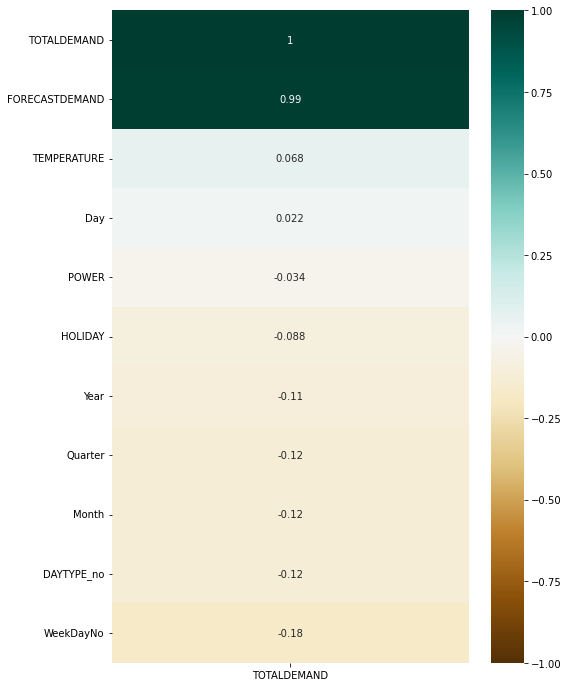

In [42]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(state.corr()[['TOTALDEMAND']].sort_values(by='TOTALDEMAND', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

<AxesSubplot:xlabel='DATETIME'>

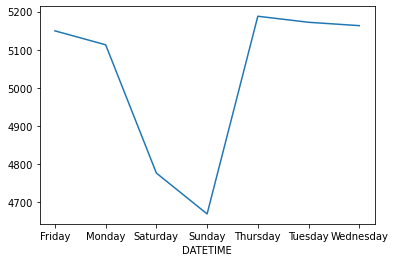

In [50]:
df.groupby(df["DATETIME"].dt.day_name())["TOTALDEMAND"].mean().plot(kind='line', rot=0)

<AxesSubplot:xlabel='DATETIME'>

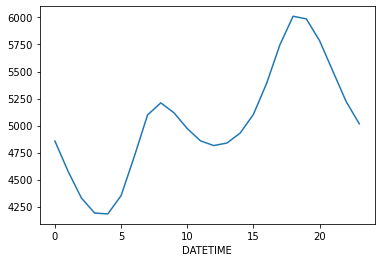

In [52]:
df.groupby(df["DATETIME"].dt.hour)["TOTALDEMAND"].mean().plot(kind='line', rot=0)

<AxesSubplot:xlabel='DATETIME'>

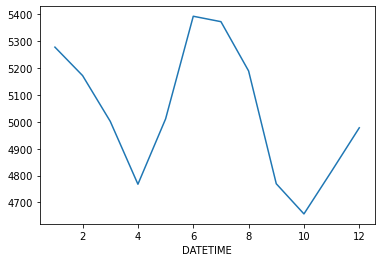

In [53]:
df.groupby(df["DATETIME"].dt.month)["TOTALDEMAND"].mean().plot(kind='line', rot=0)

<AxesSubplot:xlabel='Season'>

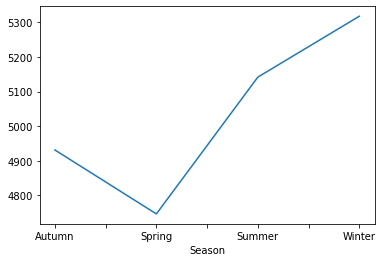

In [54]:
df.groupby(df["Season"])["TOTALDEMAND"].mean().plot(kind='line', rot=0)

<AxesSubplot:xlabel='DAYTYPE'>

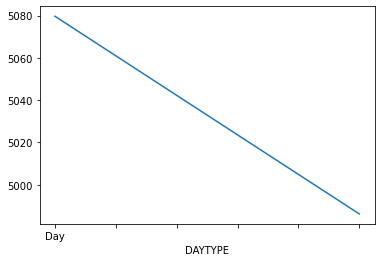

In [57]:
df.groupby(df["DAYTYPE"])["TOTALDEMAND"].mean().plot(kind='line', rot=0)

<AxesSubplot:xlabel='Season'>

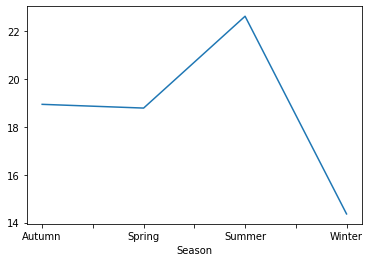

In [55]:
df.groupby(df["Season"])["TEMPERATURE"].mean().plot(kind='line', rot=0)

In [56]:
percent_missingdf = round(df.isnull().sum() * 100 / len(df),2)
missing_value_df = pd.DataFrame({'% Missing': percent_missingdf})
missing_value_df

,% Missing
STATE,0.0
DATETIME,0.0
TOTALDEMAND,0.0
POWER,0.0
LOCATION,0.0
TEMPERATURE,0.0
FORECASTDEMAND,0.0
Weekday,0.0
Quarter,0.0
Month,0.0
